# Heart Attack Dataset Analysis

This is notebook is for analysing the Heart Attack dataset in kaggle (https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) 

This notebook goes through each and every available variable that might contribute to the probability of a heart attack and gives an estimation of the values that might lead to a heart attack for every variable.

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [ ]:
#reading the csv files
o2_filepath='/work/o2Saturation.csv'
heart_filepath='/work/heart.csv'
o2_data=pd.read_csv(o2_filepath)
heart_data=pd.read_csv(heart_filepath)

# O2 saturation Data

In [ ]:
o2_data.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [ ]:
o2_data.columns

Index(['98.6'], dtype='object')

In [ ]:
o2_data["98.6"].unique()

array([98.6, 98.1, 97.5, 98. , 97. , 96.5, 97.1, 97.6, 98.2, 96.9, 97.9,
       97.2, 99.3, 98.9, 98.3, 99.6, 98.8])

In [ ]:
len(o2_data["98.6"].unique())

17

We can notice here that there isn't much variation in the levels of O2 saturation, and that there are only 17 unique values in our dataset.

In [ ]:
o2_data.mean()

98.6    98.239275
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f008ee31450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f008ee31c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f008ee7db50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f008ee42550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f008ee42990>],
 'means': []}

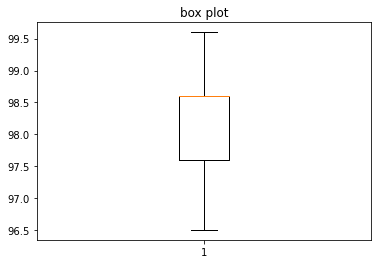

<Figure size 1440x720 with 0 Axes>

In [ ]:
fig, ax1=plt.subplots()
plt.figure(figsize=(20,10))
ax1.set_title('box plot')
ax1.boxplot(o2_data)

In [ ]:
o2_data.value_counts()

98.6
98.6    1661
97.5     704
97.6     579
99.6     359
96.5     104
98.2      32
98.0      29
97.9      25
98.1      23
99.3      21
98.8      13
97.1       9
97.0       9
98.9       8
96.9       5
97.2       3
98.3       1
dtype: int64

In [ ]:
o2_data.describe()

,98.6
count,3585.000000
mean,98.239275
std,0.726336
min,96.500000
25%,97.600000
50%,98.600000
75%,98.600000
max,99.600000


Through these previous blocks of code, we can conclude that the standard level of O2 saturation ranges from 96.5 to 98.6

In [ ]:
n=0
s=o2_data.squeeze()
for i in range  (0,len(o2_data['98.6'])):
    if 96.5<= s[i] <=98.6:
        n+=1
print(n)

3184


In [ ]:
o2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


In [ ]:
100*(3184/3585)

88.81450488145049

Since the values ranging from 96.5 to 98.6 represent 88.81% of the values then it's safe to assume that usual values are these values, adding that the most common one out of them is 96.5

<AxesSubplot:xlabel='98.6', ylabel='Count'>

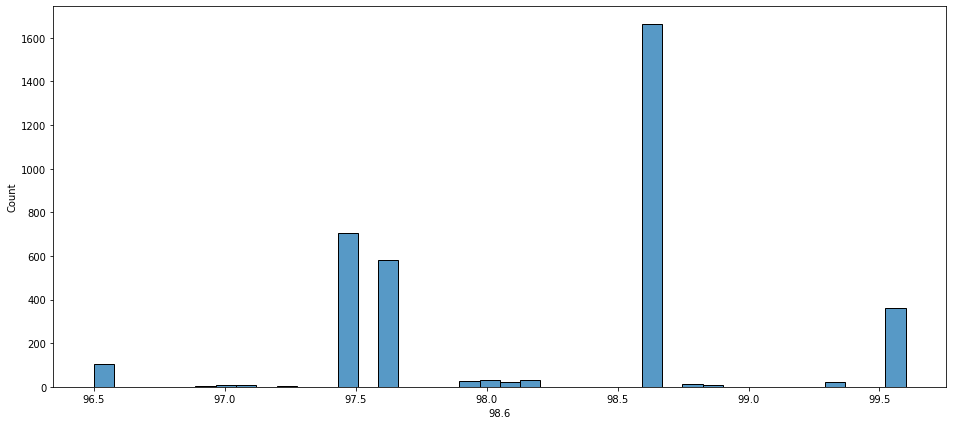

In [ ]:
plt.figure(figsize=(16,7))
sns.histplot(data=o2_data['98.6'], bins=40)

# Heart Attack Dataset

## Data preparation

In [ ]:
#spliting the data into training and test data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(heart_data, test_size=0.2, random_state=42)

In [ ]:
#resetting the indexes
train_set=train_set.reset_index(drop=True)
test_set=test_set.reset_index(drop=True)

In [ ]:
train_set.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
2,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
3,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
4,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


In [ ]:
test_set.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trtbps    242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalachh  242 non-null    int64  
 8   exng      242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slp       242 non-null    int64  
 11  caa       242 non-null    int64  
 12  thall     242 non-null    int64  
 13  output    242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.6 KB


There aren't any null values or columns in the dataset

In [ ]:
train_set.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.462810,0.657025,0.991736,130.359504,246.842975,0.128099,0.553719,150.115702,0.314050,1.013223,1.421488,0.681818,2.301653,0.549587
std,9.204492,0.475687,1.022533,16.828858,52.795465,0.334893,0.530410,22.352398,0.465098,1.102577,0.607724,0.990620,0.593811,0.498566
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


There output reprsents whether the person had a heart-attack (output=1) or not (output=0)

In [ ]:
heart_attack=train_set.loc[train_set.output==1]
n_heart_attack=train_set.loc[train_set.output==0]

In [ ]:
len(heart_attack), len(n_heart_attack)

(133, 109)

## Data analysis

### Sex variable

In [ ]:
heart_attack.sex.value_counts(normalize=True)

1    0.526316
0    0.473684
Name: sex, dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

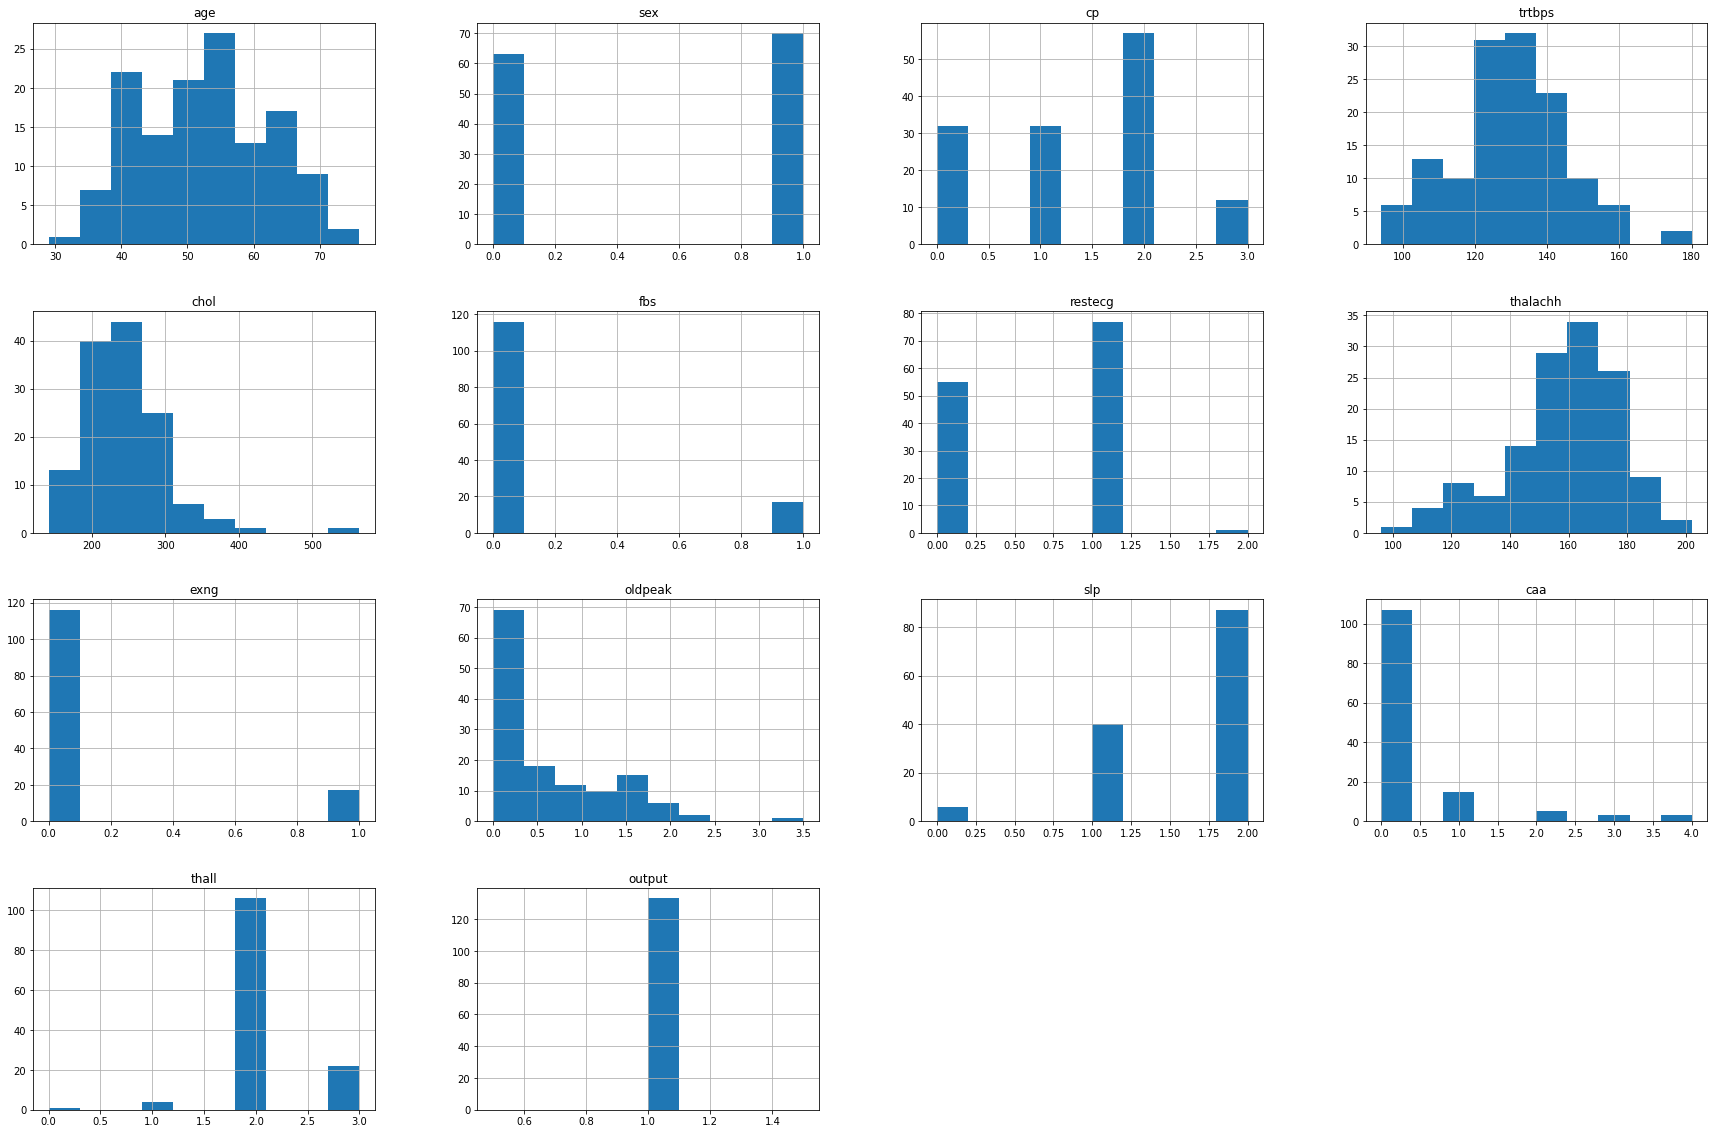

In [ ]:
heart_attack.hist(figsize=(30,20))

In [ ]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### Age variable

<AxesSubplot:>

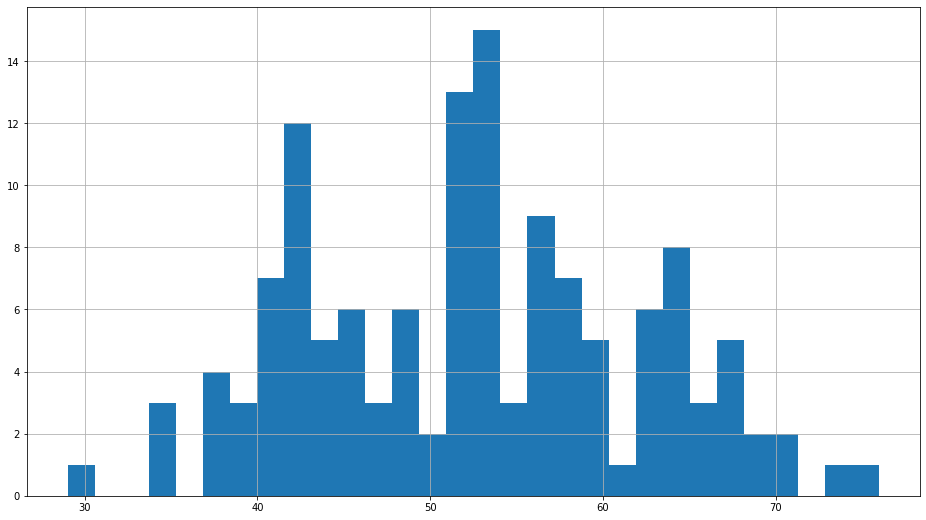

In [ ]:
heart_attack.age.hist(figsize=(16,9), bins=30)

In [ ]:
def age_category_values(df):
    m1=round(df.max()/5)*5
    m2=round(df.min()/5)*5
    L=[i for i in range(m2,m1,5)]
    dicts={}
    M=[]
    for a in range(len(L)):
        dicts[L[a]]=0
    for j in df:
        for k in L:
            if j<k:
                dicts[k]+=1
                break
    for b in dicts:
        M.append(([b-5,b],dicts[b]))
    return M

In [ ]:
age_category_values(heart_attack.age)

[([25, 30], 1),
 ([30, 35], 1),
 ([35, 40], 9),
 ([40, 45], 24),
 ([45, 50], 15),
 ([50, 55], 30),
 ([55, 60], 22),
 ([60, 65], 13),
 ([65, 70], 14)]

In [ ]:
s=0
for i in heart_attack.age:
    if 40<= i:
        s+=1
m=len(heart_attack)
print(100*s/m)

91.72932330827068


Most of people approximatly 91.71% who have a heart attack are over the age of 40

### CP variable

The cp column represents the chest pain type

Value 1: typical angina which is defined as substernal&nbsp;chest pain&nbsp;precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin

Value 2: atypical angina (Unlike&nbsp;typical chest pain, which is usually a dull&nbsp;pain&nbsp;or pressure sensation,&nbsp;atypical chest pain&nbsp;may be sharp, stabbing, or tearing.&nbsp;Atypical chest pain&nbsp;may get worse when breathing in, may get better with leaning forward, and may be worse when you push on the&nbsp;chest)

Value 3: non-anginal pain

Value 4: asymptomatic

In [ ]:
heart_attack.cp.value_counts()

2    57
0    32
1    32
3    12
Name: cp, dtype: int64

<AxesSubplot:>

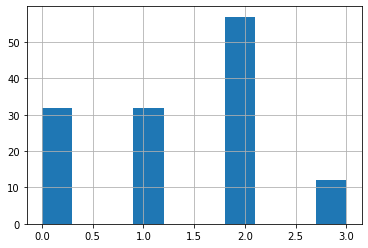

In [ ]:
heart_attack.cp.hist()

In [ ]:
heart_attack.cp.value_counts(normalize=True)

2    0.428571
0    0.240602
1    0.240602
3    0.090226
Name: cp, dtype: float64

Almost half the people with a heart attack have no anginal pain and the other have a certain type of anginal pain, thus we can safely conclude that anginal pain isn't a good criteria for heart attacks

### Trtbps variable

trtbps : resting blood pressure (in mm Hg)

<AxesSubplot:>

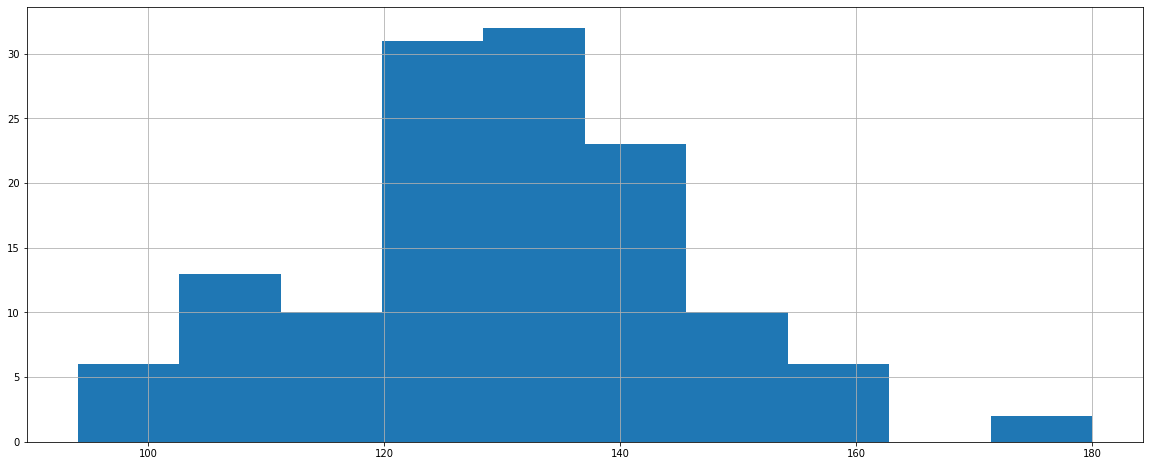

In [ ]:
heart_attack.trtbps.hist(figsize=(20,8))

In [ ]:
def category_values(df, step):
    m1=round(df.max()/step)*step
    m2=round(df.min()/step)*step
    L=[i for i in range(m2,m1+(2*step),step)]
    dicts={}
    M=[]
    for a in range(len(L)):
        dicts[L[a]]=0
    for j in df:
        for k in L:
            if j<k:
                dicts[k]+=1
                break
    for b in dicts:
        M.append(([b-step,b],dicts[b]))
    return M

In [ ]:
category_values(heart_attack.trtbps,10)

[([80, 90], 0),
 ([90, 100], 2),
 ([100, 110], 11),
 ([110, 120], 16),
 ([120, 130], 31),
 ([130, 140], 40),
 ([140, 150], 17),
 ([150, 160], 10),
 ([160, 170], 4),
 ([170, 180], 1),
 ([180, 190], 1)]

<AxesSubplot:xlabel='trtbps', ylabel='Count'>

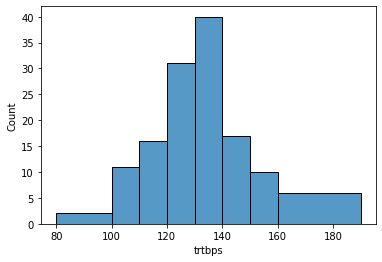

In [ ]:
sns.histplot(data=heart_attack,x="trtbps", bins=(80,100,110,120,130,140,150,160,190))

In [ ]:
a=0
for i in heart_attack.trtbps:
    if 110 <= i <=150:
        a+=1
print(100*(a/m))

82.70676691729322


Since the most of the values of the trtbps index range from 110 to 150(around 82.70%) it is safe to assume that most of heart attacks are associated with a blood pressure between 110 and 150

### chol variable

chol : cholestoral in mg/dl fetched via BMI sensor

<AxesSubplot:>

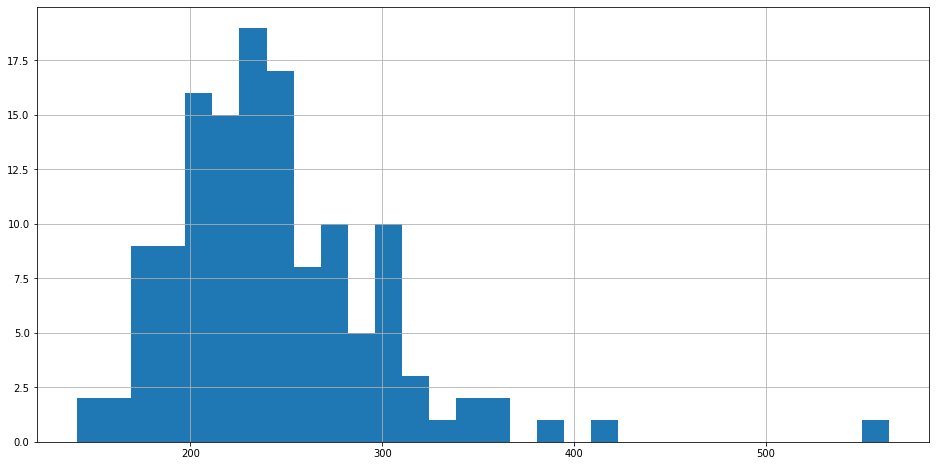

In [ ]:
heart_attack.chol.hist(figsize=(16,8), bins=30)

In [ ]:
category_values(heart_attack.chol,20)

[([120, 140], 0),
 ([140, 160], 3),
 ([160, 180], 7),
 ([180, 200], 15),
 ([200, 220], 21),
 ([220, 240], 26),
 ([240, 260], 20),
 ([260, 280], 15),
 ([280, 300], 6),
 ([300, 320], 11),
 ([320, 340], 2),
 ([340, 360], 3),
 ([360, 380], 1),
 ([380, 400], 1),
 ([400, 420], 1),
 ([420, 440], 0),
 ([440, 460], 0),
 ([460, 480], 0),
 ([480, 500], 0),
 ([500, 520], 0),
 ([520, 540], 0),
 ([540, 560], 0),
 ([560, 580], 1)]

In [ ]:
a=0
for i,j in category_values(heart_attack.chol,20):
    if i[0]>=180 and i[1]<=320:
        a+=j
print((a/len(heart_attack.chol))*100,"%")

85.71428571428571 %


Most of the individuals who had a heart attack had a cholesterol level ranging from 180 and 320

### fbs variable

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

<AxesSubplot:>

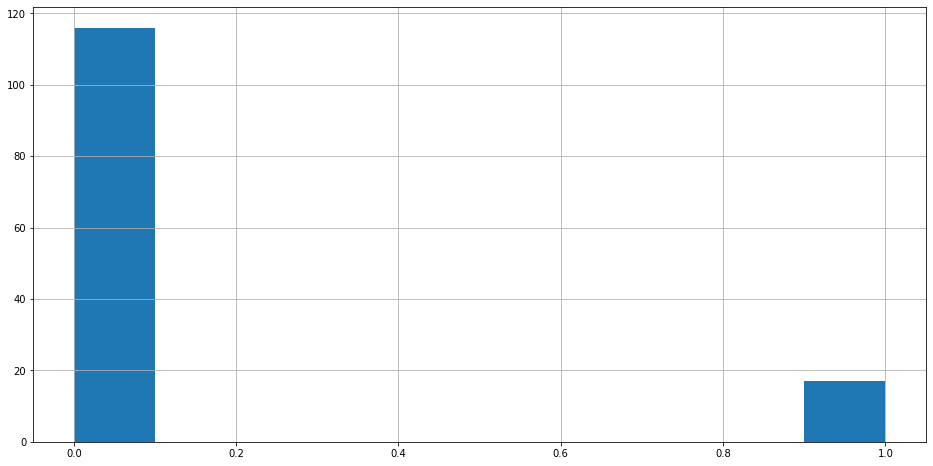

In [ ]:
heart_attack.fbs.hist(figsize=(16,8))

<AxesSubplot:xlabel='fbs', ylabel='Probability'>

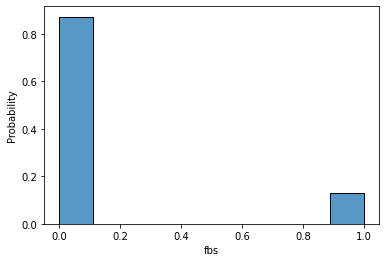

In [ ]:
sns.histplot(data=heart_attack, x="fbs", stat="probability")

Thus we can safely conclude that most of the people(around 90%) who had a heart attack had fasting blood sugar > 120 mg/dl

### REST ECG variable

rest_ecg : resting electrocardiographic results

    -Value 0: normal
    -Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

<AxesSubplot:>

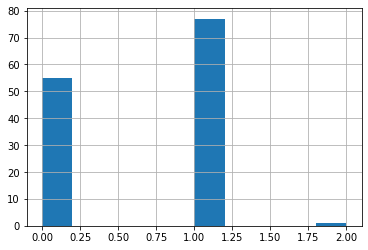

In [ ]:
heart_attack.restecg.hist()

In [ ]:
heart_attack.restecg.value_counts()

1    77
0    55
2     1
Name: restecg, dtype: int64

<AxesSubplot:xlabel='restecg', ylabel='Probability'>

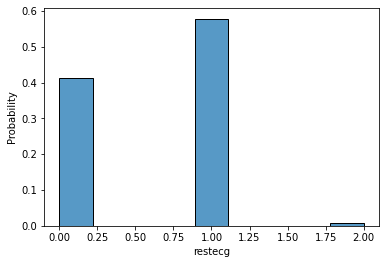

In [ ]:
sns.histplot(data=heart_attack, x="restecg", stat="probability")

Thus most of the people with a heart attack have a either a normal resting electrocardio or having ST-T wave abnormality with latter having a slightly higher likelihood

### Thalach variable

thalach : maximum heart rate achieved

<AxesSubplot:>

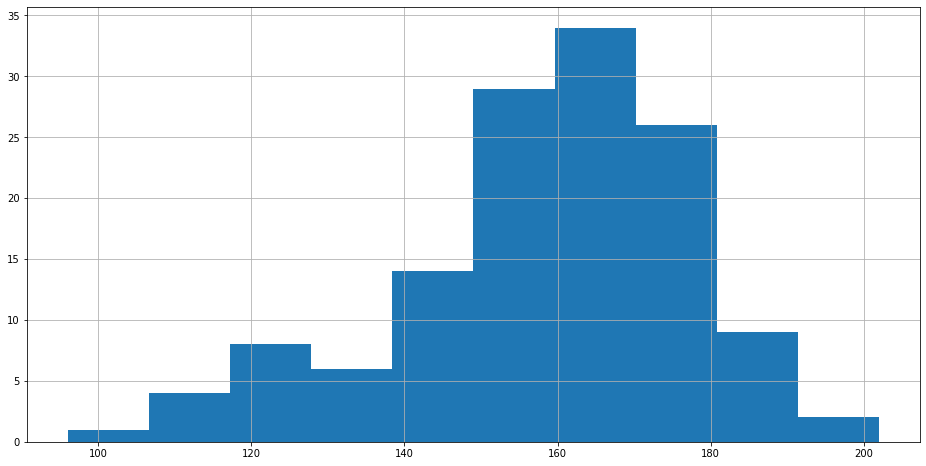

In [ ]:
heart_attack.thalachh.hist(figsize=(16,8))

In [ ]:
category_values(heart_attack.thalachh, 20)

[([80, 100], 1),
 ([100, 120], 4),
 ([120, 140], 15),
 ([140, 160], 42),
 ([160, 180], 59),
 ([180, 200], 11),
 ([200, 220], 1)]

In [ ]:
heart_attack.thalachh.max(), heart_attack.thalachh.min()

(202, 96)

In [ ]:
a=0
for i,j in category_values(heart_attack.thalachh,20):
    if i[0]>=120 and i[1]<=180:
        a+=j
print((a/len(heart_attack.thalachh))*100,"%")

87.21804511278195 %


Most of the people with heart attacks have a max heartbeat ranging from 120 to 180

### exng variable

exang: exercise induced angina (1 = yes; 0 = no)

<AxesSubplot:>

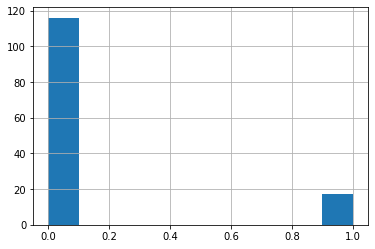

In [ ]:
heart_attack.exng.hist()

<AxesSubplot:xlabel='exng', ylabel='Probability'>

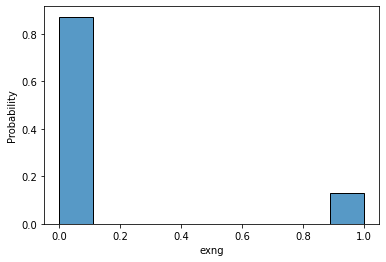

In [ ]:
sns.histplot(data=heart_attack, x="exng", stat="probability")

Around 90% of the individuals with a heart attack never had an exercise induced angina

### slp variable

slp: slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

<AxesSubplot:>

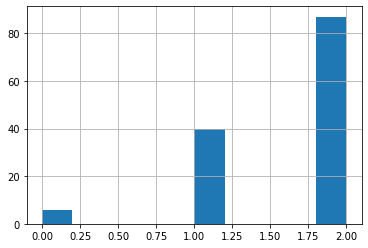

In [ ]:
heart_attack.slp.hist()

<AxesSubplot:xlabel='slp', ylabel='Probability'>

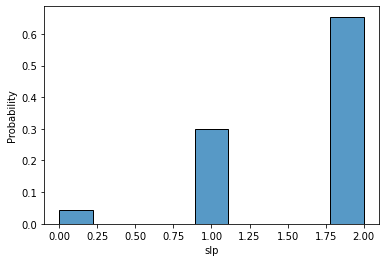

In [ ]:
sns.histplot(data=heart_attack, x="slp", stat="probability")

We can conclude that around 65% of the individuals with heart attacks had an upsloping and almost 30% had a flat slope while the other 5% had a downsloping

### caa variable

caa - number of major vessels (0-4) colored by flourosopy

<AxesSubplot:>

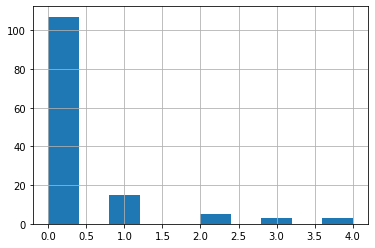

In [ ]:
heart_attack.caa.hist()

<AxesSubplot:xlabel='caa', ylabel='Probability'>

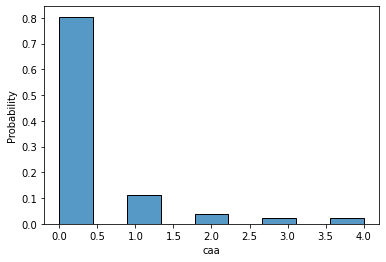

In [ ]:
sns.histplot(data=heart_attack, x="caa", stat="probability")

Most of the individuals who had heart attack (around 80% of them) had a value of 0 for the caa

### thall variable

thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

<AxesSubplot:>

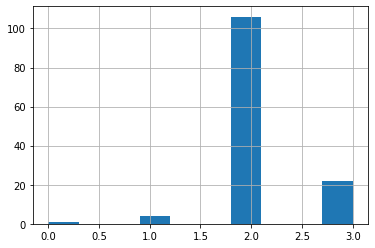

In [ ]:
heart_attack.thall.hist()

<AxesSubplot:xlabel='thall', ylabel='Probability'>

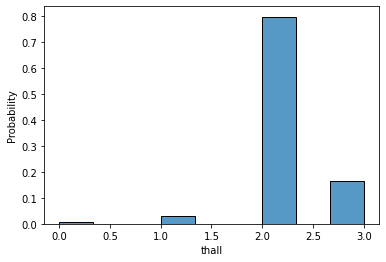

In [ ]:
sns.histplot(data=heart_attack, x="thall", stat="probability")

Most&nbsp;of&nbsp;the&nbsp;individuals&nbsp;who&nbsp;had&nbsp;heart&nbsp;attack&nbsp;(around&nbsp;80%&nbsp;of&nbsp;them)&nbsp;had&nbsp;a&nbsp;value&nbsp;of&nbsp;2&nbsp;for&nbsp;the&nbsp;thall followed by 11% that had a value of 3

### Correlation Matrix

In [ ]:
corr_matrix = train_set.corr()
corr_matrix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.099115,-0.103195,0.285224,0.231922,0.131451,-0.127500,-0.396378,0.148128,0.202352,-0.163345,0.297449,0.063933,-0.233782
sex,-0.099115,1.000000,-0.048505,-0.093901,-0.206036,0.042515,-0.050016,-0.032935,0.151280,0.149506,-0.043297,0.154897,0.220892,-0.304156
cp,-0.103195,-0.048505,1.000000,0.028868,-0.072812,0.160627,0.008473,0.290694,-0.360966,-0.143071,0.112465,-0.154172,-0.187221,0.407768
trtbps,0.285224,-0.093901,0.028868,1.000000,0.147664,0.186164,-0.067485,-0.037638,0.058674,0.132442,-0.039626,0.056918,0.006542,-0.104257
chol,0.231922,-0.206036,-0.072812,0.147664,1.000000,0.050426,-0.130684,0.012983,0.041559,0.111442,0.016556,0.022287,0.075106,-0.057714
fbs,0.131451,0.042515,0.160627,0.186164,0.050426,1.000000,-0.073940,-0.002542,0.007045,-0.004606,-0.062511,0.098354,-0.028194,-0.000924
restecg,-0.127500,-0.050016,0.008473,-0.067485,-0.130684,-0.073940,1.000000,0.016973,-0.018210,0.009423,0.032447,-0.042357,0.047144,0.084031
thalachh,-0.396378,-0.032935,0.290694,-0.037638,0.012983,-0.002542,0.016973,1.000000,-0.397850,-0.344940,0.329956,-0.224513,-0.083921,0.393415
exng,0.148128,0.151280,-0.360966,0.058674,0.041559,0.007045,-0.018210,-0.397850,1.000000,0.314720,-0.264729,0.082691,0.241504,-0.443217
oldpeak,0.202352,0.149506,-0.143071,0.132442,0.111442,-0.004606,0.009423,-0.344940,0.314720,1.000000,-0.555152,0.225349,0.204291,-0.447305


<AxesSubplot:>

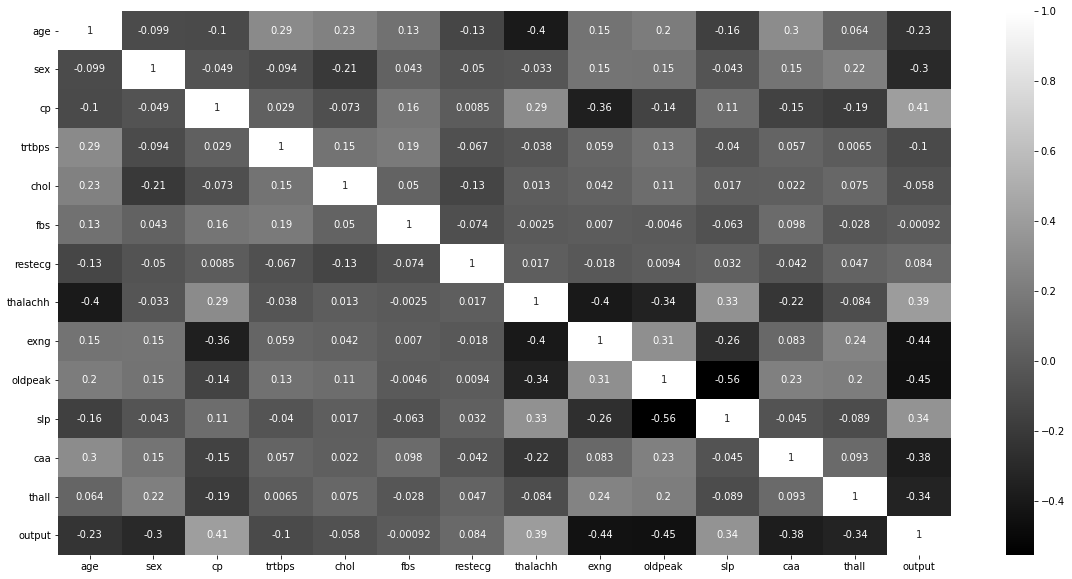

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.gray)

Thus we can conclude that there isn't any real correlation between these variables except for the one between slp and old peak

As for the correlation with the output, the variables that correlate most with the output are exng, oldpeak and caa and thall although all of the correlations are over -0.5

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f79ded91-0775-416a-9692-d0d080c1d3fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>